In [1]:
#ref for downloading and importing from internet : https://stackoverflow.com/questions/6861323/download-and-unzip-file-with-python

import urllib.request
import zipfile
import os

cwd = os.getcwd()
    
url = "https://cricsheet.org/downloads/ipl_csv2.zip"
extract_dir = cwd+"/data"

zip_path, _ = urllib.request.urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)

In [2]:

import urllib.request
import zipfile
import os

cwd = os.getcwd()

### Import basic libraries

In [3]:
import pandas as pd
import numpy as np

### Load the all IPL matches csv file

In [4]:
df = pd.read_csv(cwd+"/data/all_matches.csv",dtype = {'match_id':'int', 'season':'str','innings':'int', 'ball':'float'},parse_dates=True)
df.season = df.season.replace({"2007/08": "2008","2009/10": "2010","2020/21":"2020"})

In [5]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [6]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225953,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
season_dict = dict()
for season in df.season.unique():
    season_dict[season] = df[df.season==season]

In [8]:
(season_dict['2011'].runs_off_bat.sum()+season_dict['2011'].extras.sum())*6/season_dict['2011'].shape[0]

7.460412625639217

In [9]:
(season_dict['2022'].runs_off_bat.sum()+season_dict['2022'].extras.sum())*6/season_dict['2022'].shape[0]

8.171616793211255

In [10]:
season_dict['2022'].groupby(['runs_off_bat',"striker"]).size()[0]

striker
A Badoni              57
A Manohar             30
A Nortje               6
A Tomar                7
AD Russell            92
                    ... 
WP Saha              112
Washington Sundar     28
YBK Jaiswal           85
YS Chahal              4
Yash Dayal             1
Length: 173, dtype: int64

In [11]:
season_dict['2022'][season_dict['2022'].wides.isna()].groupby(['runs_off_bat',"striker"]).size()[6]

striker
A Badoni              7
A Manohar             3
AD Russell           32
AJ Finch              3
AK Markram           19
                     ..
V Kohli               8
VR Iyer               7
WP Saha               7
Washington Sundar     3
YBK Jaiswal          10
Length: 112, dtype: int64

In [15]:
from functools import reduce
def contributions(season_dict = season_dict):
    contri_dict = dict()
    for season in list(season_dict.keys()):
        batting_contri = season_dict[season].groupby(["striker"])['runs_off_bat'].agg(balls_faced_all="count",runs_total="sum").reset_index()
        no_balls = season_dict[season][season_dict[season]['noballs'].notna()].groupby(["striker"])['runs_off_bat'].agg(no_balls_faced="count").reset_index()
        wides = season_dict[season][season_dict[season]['wides'].notna()].groupby(["striker"])['runs_off_bat'].agg(wides_faced="count").reset_index()
        byes = season_dict[season][season_dict[season]['byes'].notna()].groupby(["striker"])['runs_off_bat'].agg(byes_faced="count").reset_index()
        legbyes = season_dict[season][season_dict[season]['legbyes'].notna()].groupby(["striker"])['runs_off_bat'].agg(leg_byes_faced="count").reset_index()
        penalty = season_dict[season][season_dict[season]['penalty'].notna()].groupby(["striker"])['runs_off_bat'].agg(penalties_faced="count").reset_index()
        dots = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"striker"]).size()[0].rename('0s')
        singles = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"striker"]).size()[1].rename('1s')
        doubles = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"striker"]).size()[2].rename('2s')
        threes = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"striker"]).size()[3].rename('3s')
        fours = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"striker"]).size()[4].rename('4s')
        sixes = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"striker"]).size()[6].rename('6s')
        merged_df_bat = reduce(lambda x,y: pd.merge(x,y, on='striker', how='outer'), [batting_contri, no_balls,wides,byes,legbyes,penalty,dots,singles,doubles,threes,fours,sixes])
        merged_df_bat.fillna(0,inplace=True)
        merged_df_bat['balls_faced_eff'] = merged_df_bat['balls_faced_all']-merged_df_bat['wides_faced']
        merged_df_bat.rename(columns={'striker':'player'},inplace=True)
        bowl_df = season_dict[season].groupby(["bowler"])['runs_off_bat'].agg(balls_bowled="count",runs_conceded_off_bat="sum").reset_index()
        extras_df = season_dict[season].groupby(["bowler"])['extras'].agg(extras_conceded="sum").reset_index()
        wides_df = season_dict[season].groupby(["bowler"])['wides'].agg(wides_conceded="count").reset_index()
        nb_df = season_dict[season].groupby(["bowler"])['noballs'].agg(noballs_bowled="count").reset_index()
        dots_bowl = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"bowler"]).size()[0].rename('dots_bowled')
        ones_bowl = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"bowler"]).size()[1].rename('singles_bowled')
        twos_bowl = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"bowler"]).size()[2].rename('doubles_bowled')
        threes_bowl = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"bowler"]).size()[3].rename('threes_bowled')
        fours_bowl = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"bowler"]).size()[4].rename('fours_bowled')
        sixes_bowl = season_dict[season][season_dict[season].wides.isna()].groupby(['runs_off_bat',"bowler"]).size()[4].rename('sixes_bowled')
        wicket_df = season_dict[season][season_dict[season].wicket_type!="run out"].groupby(["bowler"])['wicket_type'].agg(wickets_taken="count").reset_index()
        merged_df_bowl = reduce(lambda x,y: pd.merge(x,y, on='bowler', how='outer'), [bowl_df, extras_df,wicket_df,wides_df,nb_df,dots_bowl,fours_bowl,sixes_bowl])
        merged_df_bowl.fillna(0,inplace=True)
        merged_df_bowl.rename(columns={'bowler':'player'},inplace=True)
        final_merged_df = pd.merge(merged_df_bat,merged_df_bowl,on='player',how='outer')
        final_merged_df.fillna(0,inplace=True)
        final_merged_df['total_deliveries_contributed'] = final_merged_df['balls_faced_all']+final_merged_df['balls_bowled']
        final_merged_df['season'] = season
        contri_dict[season] = final_merged_df
    return contri_dict

In [16]:
df = contributions()

In [49]:
df['2022'][df['2022'].player=='SP Narine']['6s']

146    6.0
Name: 6s, dtype: float64

In [ ]:
#reference for text labels : https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn

In [18]:
import chart_studio
username='rajaah.djey'
api_key='HlHcfBUo6KlsgO35BIno'
chart_studio.tools.set_credentials_file(username=username,api_key=api_key)

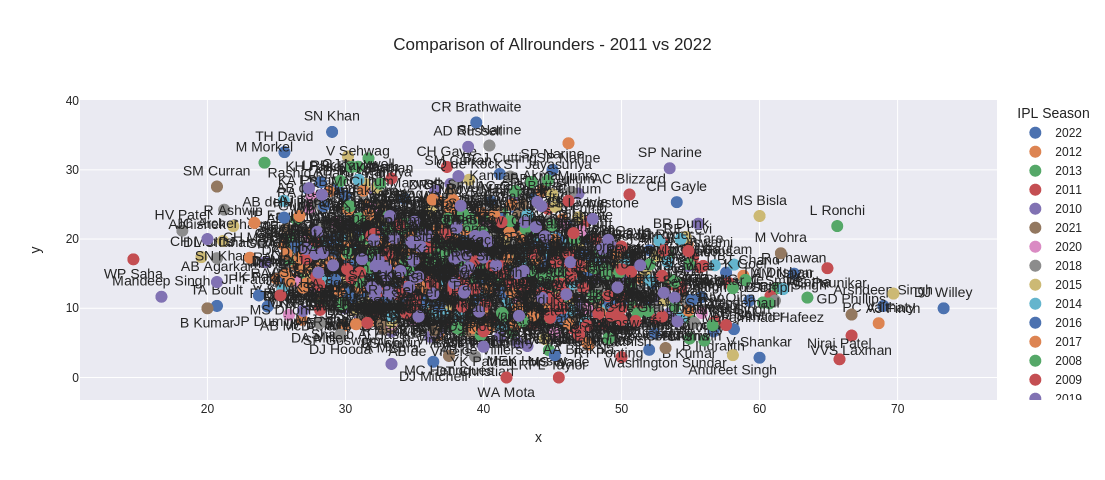

In [55]:
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
df_to_plot = pd.DataFrame(columns=df['2022'].columns)
for season in season_dict.keys():
    filtered_df = df[season][(df[season].balls_faced_all>=30)]
    df_to_plot = pd.concat([df_to_plot,filtered_df])
#df_to_plot = df_to_plot[df_to_plot.player=='SP Narine']
df_to_plot.sort_values(by='balls_faced_all',inplace=True)
df_to_plot.reset_index(inplace=True)
fig = px.scatter(df_to_plot,color='season',text='player',x=(df_to_plot['0s']/df_to_plot.balls_faced_eff)*100,
                 y=((df_to_plot['4s']+df_to_plot['6s'])/df_to_plot.balls_faced_eff)*100,
                 width=1080,height=480,template='seaborn',
                labels={
                     "season": "IPL Season",
                     "player": "Player",
                     "balls_faced_all": "Total Deliveries Faced",
                     "balls_bowled":"Total Deliveries Bowled"
                 },
                title="Comparison of Allrounders - 2011 vs 2022"
                
                
                )
fig.update_traces(textposition='top right', textfont_size=14)

fig.update_traces()


def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    positions = ['top center', 'bottom center']  # you can add more: left center ...
    return [positions[i % len(positions)] for i in range(len(x))]

fig.update_traces(marker={'size': 12},textposition=improve_text_position(df_to_plot['balls_faced_all']))


fig.show()
#p1 = sns.scatterplot(data = df_to_plot,hue='season',style='season',x='balls_faced_all',y='balls_bowled')
#ax.legend(loc = 'center left',bbox_to_anchor = (1,1),ncol=1)

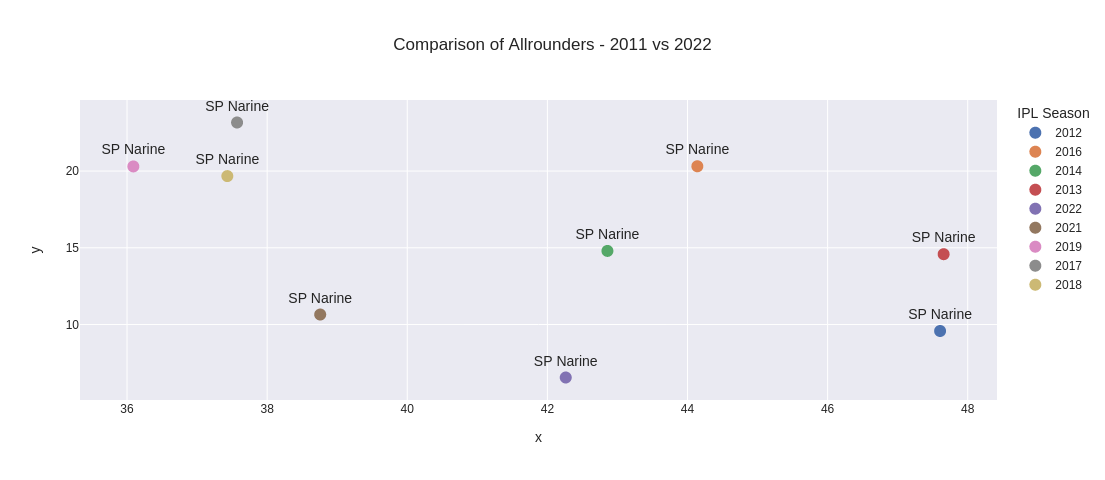

In [35]:
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
df_to_plot = pd.DataFrame(columns=df['2022'].columns)
for season in season_dict.keys():
    filtered_df = df[season][(df[season].balls_bowled>=240)]
    df_to_plot = pd.concat([df_to_plot,filtered_df])
df_to_plot = df_to_plot[df_to_plot.player=='SP Narine']
df_to_plot.sort_values(by='balls_faced_all',inplace=True)
df_to_plot.reset_index(inplace=True)
fig = px.scatter(df_to_plot,color='season',text='player',x=(df_to_plot['dots_bowled']/(df_to_plot.balls_bowled-df_to_plot.wides_conceded))*100,
                 y=((df_to_plot['fours_bowled']+df_to_plot['sixes_bowled'])/(df_to_plot.balls_bowled-df_to_plot.wides_conceded))*100,
                 width=1080,height=480,template='seaborn',
                labels={
                     "season": "IPL Season",
                     "player": "Player",
                     "balls_faced_all": "Total Deliveries Faced",
                     "balls_bowled":"Total Deliveries Bowled"
                 },
                title="Comparison of Allrounders - 2011 vs 2022"
                
                
                )
fig.update_traces(textposition='top right', textfont_size=14)

fig.update_traces()


def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    positions = ['top center', 'bottom center']  # you can add more: left center ...
    return [positions[i % len(positions)] for i in range(len(x))]

fig.update_traces(marker={'size': 12},textposition=improve_text_position(df_to_plot['balls_faced_all']))


fig.show()
#p1 = sns.scatterplot(data = df_to_plot,hue='season',style='season',x='balls_faced_all',y='balls_bowled')
#ax.legend(loc = 'center left',bbox_to_anchor = (1,1),ncol=1)

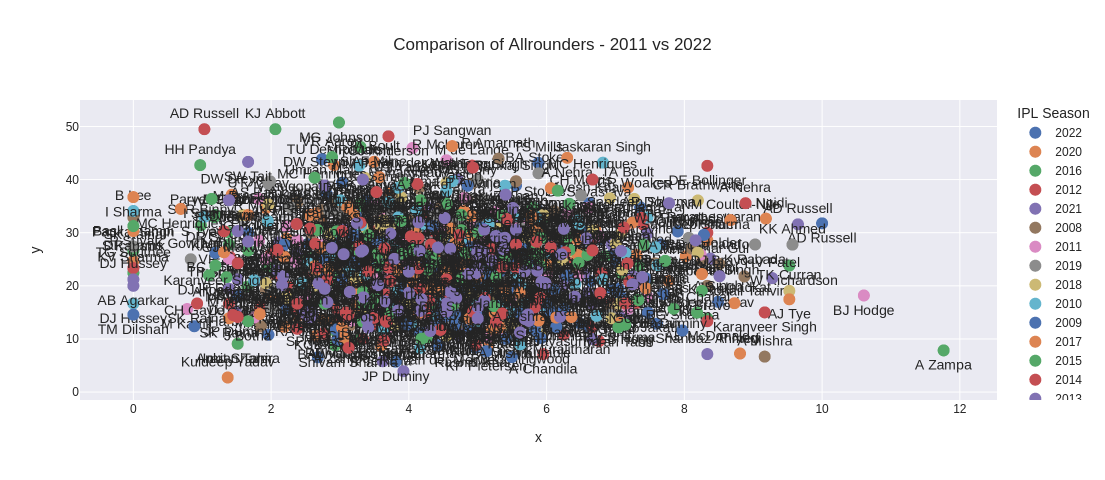

In [42]:
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
df_to_plot = pd.DataFrame(columns=df['2022'].columns)
for season in season_dict.keys():
    filtered_df = df[season][(df[season].balls_bowled>=60)]
    df_to_plot = pd.concat([df_to_plot,filtered_df])
#df_to_plot = df_to_plot[df_to_plot.player=='T Natarajan']
df_to_plot.sort_values(by='balls_faced_all',inplace=True)
df_to_plot.reset_index(inplace=True)
fig = px.scatter(df_to_plot,color='season',text='player',x=(df_to_plot['wickets_taken']/(df_to_plot.balls_bowled-df_to_plot.wides_conceded))*100,
                 y=((df_to_plot['fours_bowled']+df_to_plot['sixes_bowled'])/(df_to_plot.balls_bowled-df_to_plot.wides_conceded))*100,
                 width=1080,height=480,template='seaborn',
                labels={
                     "season": "IPL Season",
                     "player": "Player",
                     "balls_faced_all": "Total Deliveries Faced",
                     "balls_bowled":"Total Deliveries Bowled"
                 },
                title="Comparison of Allrounders - 2011 vs 2022"
                
                
                )
fig.update_traces(textposition='top right', textfont_size=14)

fig.update_traces()


def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    positions = ['top center', 'bottom center']  # you can add more: left center ...
    return [positions[i % len(positions)] for i in range(len(x))]

fig.update_traces(marker={'size': 12},textposition=improve_text_position(df_to_plot['balls_faced_all']))


fig.show()
#p1 = sns.scatterplot(data = df_to_plot,hue='season',style='season',x='balls_faced_all',y='balls_bowled')
#ax.legend(loc = 'center left',bbox_to_anchor = (1,1),ncol=1)

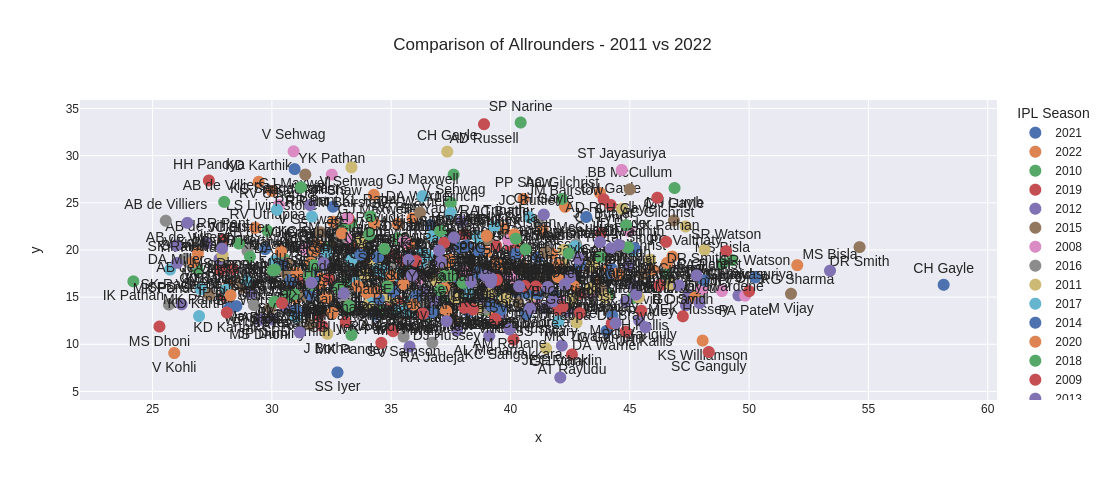

In [ ]:
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
df_to_plot = pd.DataFrame(columns=df['2022'].columns)
for season in season_dict.keys():
    filtered_df = df[season][(df[season].balls_faced_all>=180)]
    df_to_plot = pd.concat([df_to_plot,filtered_df])
df_to_plot.sort_values(by='balls_faced_all',inplace=True)
df_to_plot.reset_index(inplace=True)
fig = px.scatter(df_to_plot,color='season',text='player',x=(df_to_plot['0s']/df_to_plot.balls_faced_eff)*100,
                 y=((df_to_plot['4s']+df_to_plot['6s'])/df_to_plot.balls_faced_eff)*100,
                 width=1080,height=480,template='seaborn',
                labels={
                     "season": "IPL Season",
                     "player": "Player",
                     "balls_faced_all": "Total Deliveries Faced",
                     "balls_bowled":"Total Deliveries Bowled"
                 },
                title="Comparison of Allrounders - 2011 vs 2022"
                
                
                )
fig.update_traces(textposition='top right', textfont_size=14)

fig.update_traces()


def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    positions = ['top center', 'bottom center']  # you can add more: left center ...
    return [positions[i % len(positions)] for i in range(len(x))]

fig.update_traces(marker={'size': 12},textposition=improve_text_position(df_to_plot['balls_faced_all']))


fig.show()
#p1 = sns.scatterplot(data = df_to_plot,hue='season',style='season',x='balls_faced_all',y='balls_bowled')
#ax.legend(loc = 'center left',bbox_to_anchor = (1,1),ncol=1)

In [92]:
df_to_plot[df_to_plot['season']=='2011'].balls_faced_all.sum()

13454.0

In [17]:
py.plot(fig, filename="all_rounders", auto_open = True)

'https://plotly.com/~rajaah.djey/1/'

In [18]:
df_to_plot.columns

Index(['index', 'player', 'balls_faced_all', 'runs_total', 'no_balls_faced',
       'wides_faced', 'byes_faced', 'leg_byes_faced', 'penalties_faced',
       'balls_faced_eff', 'balls_bowled', 'runs_conceded_off_bat',
       'extras_conceded', 'wickets_taken', 'wides_conceded', 'noballs_bowled',
       'total_deliveries_contributed', 'season'],
      dtype='object')

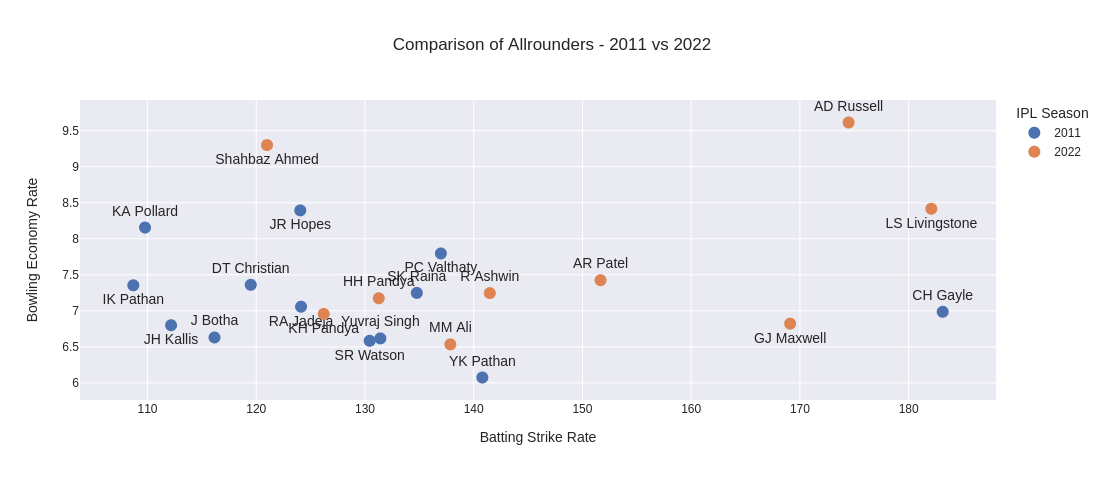

In [19]:
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
df_to_plot = pd.DataFrame(columns=df['2022'].columns)
for season in ['2011','2022']:
    filtered_df = df[season][(df[season].balls_faced_all>=120)&(df[season].balls_bowled>=120)]
    df_to_plot = pd.concat([df_to_plot,filtered_df])
df_to_plot.sort_values(by='runs_total',inplace=True)
df_to_plot.reset_index(inplace=True)
fig2 = px.scatter(df_to_plot,color='season',text='player',x=(df_to_plot.runs_total/df_to_plot.balls_faced_eff)*100,
                 y=((df_to_plot.runs_conceded_off_bat+df_to_plot.extras_conceded)/(df_to_plot.balls_bowled/6)),
                 width=1080,height=480,template='seaborn',
                labels={
                     "season": "IPL Season",
                     "player": "Player",
                     "x": "Batting Strike Rate",
                     "y":"Bowling Economy Rate"
                 },
                title="Comparison of Allrounders - 2011 vs 2022"
                
                
                )

def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    positions = ['top center', 'bottom center']  # you can add more: left center ...
    return [positions[i % len(positions)] for i in range(len(x))]

fig2.update_traces(marker={'size': 12},textposition=improve_text_position(df_to_plot['balls_faced_all']),textfont_size=14)


fig2.show()
#p1 = sns.scatterplot(data = df_to_plot,hue='season',style='season',x='balls_faced_all',y='balls_bowled')
#ax.legend(loc = 'center left',bbox_to_anchor = (1,1),ncol=1)

In [20]:
py.plot(fig2, filename="all_rounders_2", auto_open = True)

'https://plotly.com/~rajaah.djey/5/'

In [21]:
player_df = pd.read_csv('player_details.csv')

In [29]:
player_df.columns

Index(['Unnamed: 0', 'season', 'team', 'identifier', 'name', 'unique_name',
       'key_cricinfo', 'batting_style', 'player_type', 'bowling_style'],
      dtype='object')

In [56]:
matchup_dict_2011 = dict()
for players in df_to_plot[df_to_plot.season=='2011'].player:
    filter_app = season_dict['2011'][season_dict['2011'].bowler==players].groupby(["striker"])["runs_off_bat"].agg(balls_bowled="count",runs_off_bat="sum").reset_index()
    filter_app.rename({'striker':'unique_name'},axis=1,inplace=True)
    #print(players,filter_app.shape)
    filter_h2h = filter_app.merge(player_df,how='left',on='unique_name').drop(columns=['team','identifier','key_cricinfo','bowling_style','name','player_type','season','Unnamed: 0'])
    filter_h2h.drop_duplicates(inplace=True)
    filter_h2h.reset_index(drop=True,inplace=True)
    filter_h2h.dropna(inplace=True)
    #print(filter_h2h.shape)
    matchup_dict_2011[players] = filter_h2h

In [58]:
matchup_dict_2022 = dict()
for players in df_to_plot[df_to_plot.season=='2022'].player:
    filter_app = season_dict['2022'][season_dict['2022'].bowler==players].groupby(["striker"])["runs_off_bat"].agg(balls_bowled="count",runs_off_bat="sum").reset_index()
    filter_app.rename({'striker':'unique_name'},axis=1,inplace=True)
    #print(players,filter_app.shape)
    filter_h2h = filter_app.merge(player_df,how='left',on='unique_name').drop(columns=['team','identifier','key_cricinfo','bowling_style','name','player_type','season','Unnamed: 0'])
    filter_h2h.drop_duplicates(inplace=True)
    filter_h2h.reset_index(drop=True,inplace=True)
    filter_h2h.dropna(inplace=True)
    #print(filter_h2h.shape)
    matchup_dict_2022[players] = filter_h2h

In [72]:
matchup_dict_2022['AR Patel'].head()

,unique_name,balls_bowled,runs_off_bat,batting_style
0,AD Russell,1,0,Right hand Bat
1,Anmolpreet Singh,3,4,Right hand Bat
2,Arshdeep Singh,3,0,Left hand Bat
3,B Indrajith,3,3,Right hand Bat
4,D Brevis,10,12,Right hand Bat


In [ ]:
for bowler in list(matchup_dict_2022.keys()):
    filtered_dataf = matchup_dict_2022[bowler].groupby(['batting_style'])['runs_off_bat'].agg(runs_scored='sum')
    filtered_dataf['balls_bowled'] = matchup_dict_2022[bowler].groupby(['batting_style'])['balls_bowled'].agg(balls_bowled='sum')['balls_bowled']
    fig = px.bar(data_frame = filtered_dataf,x = filtered_dataf.index,y=filtered_dataf.balls_bowled,
                title=f"Bowling Matchups of {bowler}")
    
    fig.show()

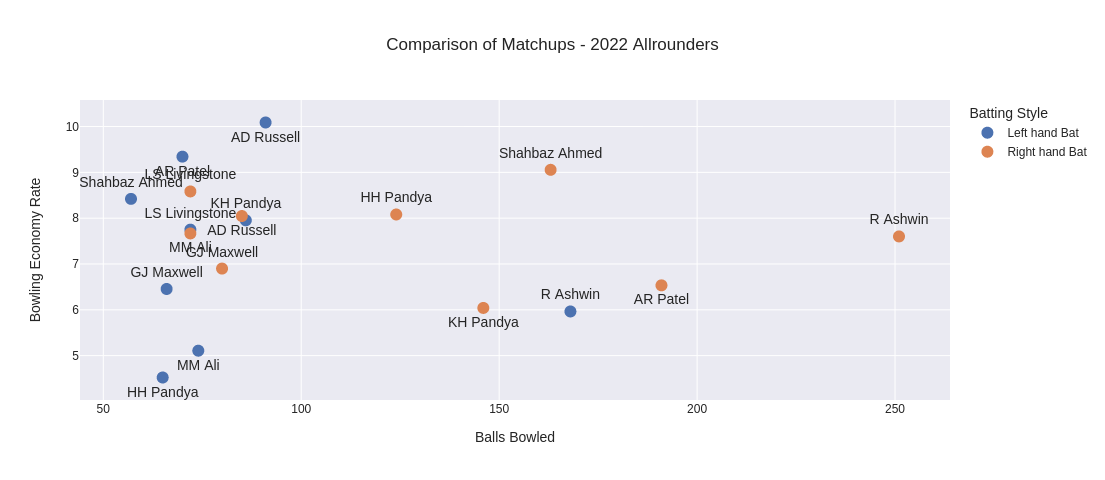

In [90]:
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
df_to_plot = pd.DataFrame(columns=['batting_style','runs_conceded','balls_bowled','bowler'])
for bowler in list(matchup_dict_2022.keys()):
    filtered_dataf = matchup_dict_2022[bowler].groupby(['batting_style'])['runs_off_bat'].agg(runs_conceded='sum').reset_index()
    filtered_dataf['balls_bowled'] = matchup_dict_2022[bowler].groupby(['batting_style'])['balls_bowled'].agg(balls_bowled='sum')['balls_bowled'].values
    filtered_dataf['bowler'] = bowler
    df_to_plot = pd.concat([df_to_plot,filtered_dataf])
df_to_plot.sort_values(by='balls_bowled',inplace=True)
df_to_plot.reset_index(drop=True,inplace=True)
fig3 = px.scatter(df_to_plot,color='batting_style',text='bowler',x=df_to_plot.balls_bowled,
                 y=(df_to_plot.runs_conceded*6/df_to_plot.balls_bowled),
                 width=1080,height=480,template='seaborn',
                labels={
                     "batting_style": "Batting Style",
                     "player": "Player",
                     "balls_bowled": "Balls Bowled",
                     "y":"Bowling Economy Rate"
                 },
                title="Comparison of Matchups - 2022 Allrounders"
                
                
                )

def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    positions = ['top center', 'bottom center']  # you can add more: left center ...
    return [positions[i % len(positions)] for i in range(len(x))]

fig3.update_traces(marker={'size': 12},textposition=improve_text_position(df_to_plot['balls_bowled']),textfont_size=14)


fig3.show()
#p1 = sns.scatterplot(data = df_to_plot,hue='season',style='season',x='balls_faced_all',y='balls_bowled')
#ax.legend(loc = 'center left',bbox_to_anchor = (1,1),ncol=1)

In [91]:
py.plot(fig3, filename="all_rounders_3", auto_open = True)

'https://plotly.com/~rajaah.djey/11/'

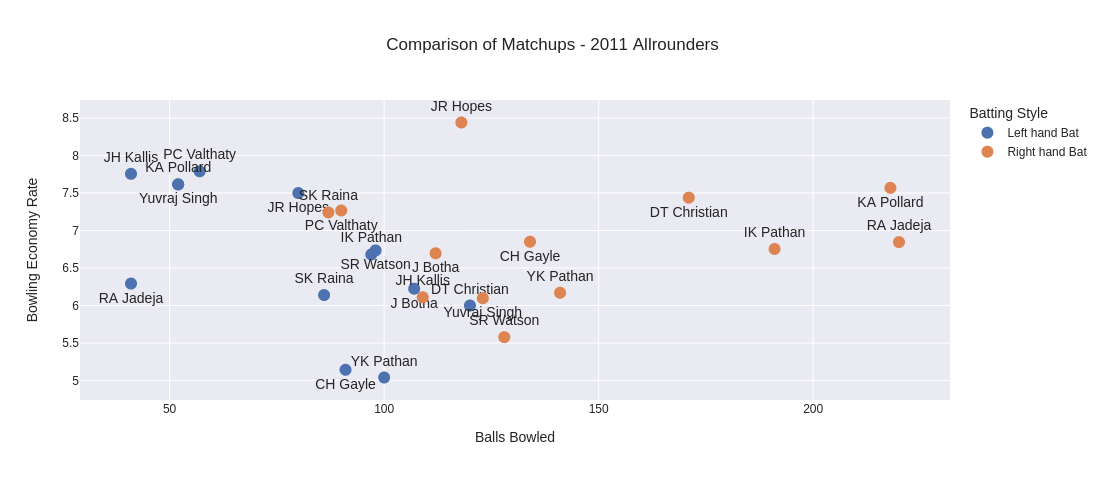

In [96]:
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
df_to_plot = pd.DataFrame(columns=['batting_style','runs_conceded','balls_bowled','bowler'])
for bowler in list(matchup_dict_2011.keys()):
    filtered_dataf = matchup_dict_2011[bowler].groupby(['batting_style'])['runs_off_bat'].agg(runs_conceded='sum').reset_index()
    filtered_dataf['balls_bowled'] = matchup_dict_2011[bowler].groupby(['batting_style'])['balls_bowled'].agg(balls_bowled='sum')['balls_bowled'].values
    filtered_dataf['bowler'] = bowler
    df_to_plot = pd.concat([df_to_plot,filtered_dataf])
df_to_plot.sort_values(by='balls_bowled',inplace=True)
df_to_plot.reset_index(drop=True,inplace=True)
fig4 = px.scatter(df_to_plot,color='batting_style',text='bowler',x=df_to_plot.balls_bowled,
                 y=(df_to_plot.runs_conceded*6/df_to_plot.balls_bowled),
                 width=1080,height=480,template='seaborn',
                labels={
                     "batting_style": "Batting Style",
                     "player": "Player",
                     "balls_bowled": "Balls Bowled",
                     "y":"Bowling Economy Rate"
                 },
                title="Comparison of Matchups - 2011 Allrounders"
                
                
                )

def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    positions = ['top center', 'bottom center']  # you can add more: left center ...
    return [positions[i % len(positions)] for i in range(len(x))]

fig4.update_traces(marker={'size': 12},textposition=improve_text_position(df_to_plot['balls_bowled']),textfont_size=14)


fig4.show()
#p1 = sns.scatterplot(data = df_to_plot,hue='season',style='season',x='balls_faced_all',y='balls_bowled')
#ax.legend(loc = 'center left',bbox_to_anchor = (1,1),ncol=1)

In [94]:
py.plot(fig4, filename="all_rounders_4", auto_open = True)

'https://plotly.com/~rajaah.djey/13/'